# Getting some random data, as a test run

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

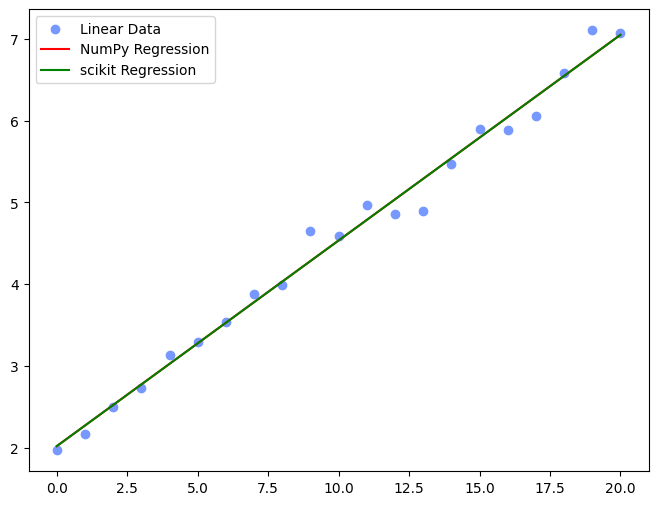

In [3]:
x_data = np.linspace(0, 20, 21)
y_data = np.linspace(2, 7, 21) + np.random.normal(0, 0.2, 21)

slope_np, intercept_np = np.polyfit(x_data, y_data, 1)

model = LinearRegression()
model.fit(x_data.reshape(-1, 1), y_data)

# Get slope & intercept
slope_sk = model.coef_[0]
intercept_sk = model.intercept_

plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data, c="#79F", label="Linear Data")
plt.plot(x_data, slope_np*x_data + intercept_np, c="r", label="NumPy Regression")
plt.plot(x_data, slope_sk*x_data + intercept_sk, c="g", label="scikit Regression")
plt.legend()
plt.show()

Appears that both Numpy and Scikit arrived at the same conclusion, but we need to test on different data for completeness.

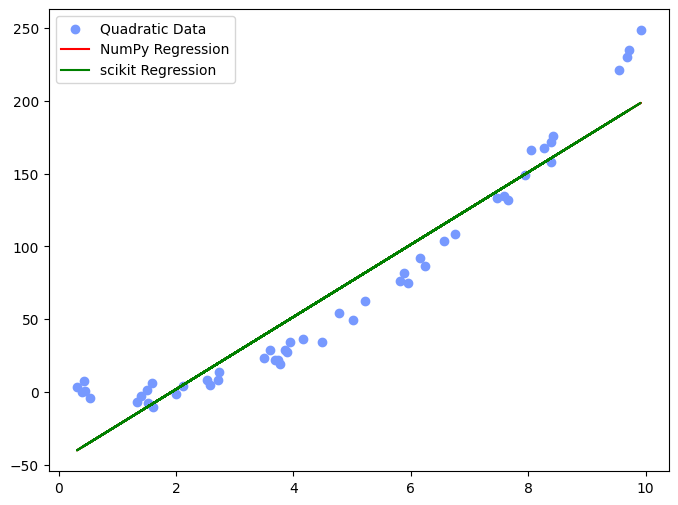

In [4]:
x_data = np.random.uniform(0, 10, 50)
y_data = 3 * x_data**2 - 5 * x_data + 2 + np.random.normal(0, 5, 50)

slope_np, intercept_np = np.polyfit(x_data, y_data, 1)

model = LinearRegression()
model.fit(x_data.reshape(-1, 1), y_data)

# Get slope & intercept
slope_sk = model.coef_[0]
intercept_sk = model.intercept_

plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data, c="#79F", label="Quadratic Data")
plt.plot(x_data, slope_np*x_data + intercept_np, c="r", label="NumPy Regression")
plt.plot(x_data, slope_sk*x_data + intercept_sk, c="g", label="scikit Regression")
plt.legend()
plt.show()

The same result again. Now lets make our own regression model.

# Where to start?

1. minimising RMSE maybe?

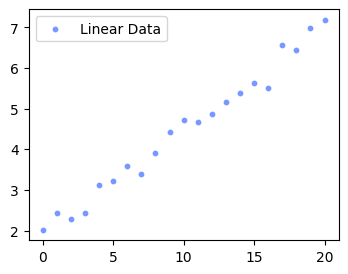

In [5]:
# take linear data as before.

x_data = np.linspace(0, 20, 21)
y_data = np.linspace(2, 7, 21) + np.random.normal(0, 0.2, 21)

plt.figure(figsize=(4, 3))
plt.scatter(x_data, y_data, s=10, c="#79F", label="Linear Data")
plt.legend()
plt.show()

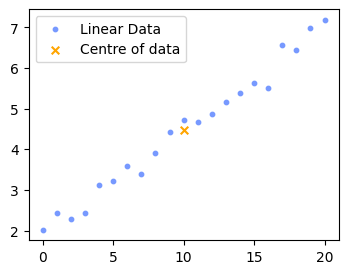

In [6]:
# start by finding the middle of the data?

x_mid = np.mean(x_data)
y_mid = np.mean(y_data)

plt.figure(figsize=(4, 3))
plt.scatter(x_data, y_data, s=10, c="#79F", label="Linear Data")
plt.scatter(x_mid, y_mid, marker="x", s=30, c="orange", label="Centre of data")
plt.legend()
plt.show()

# Equation of a line through a point, with slope $m$

$y - y_1 = m(x - x_1)$

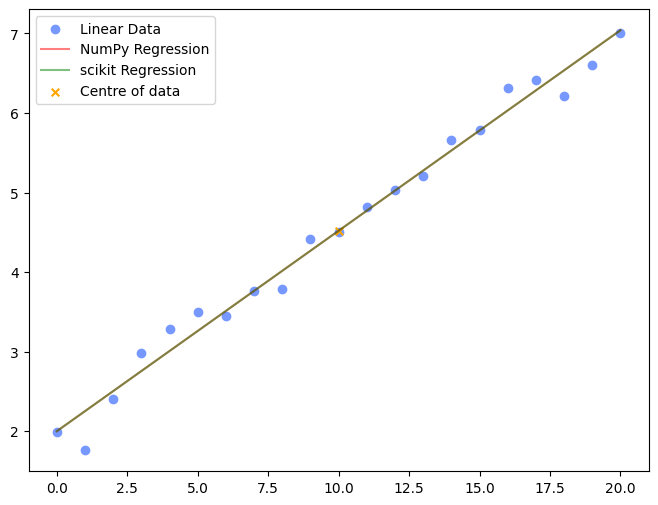

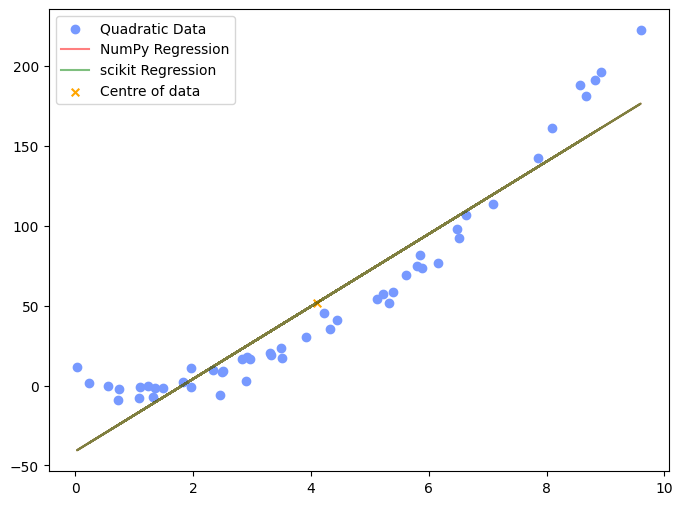

In [7]:
# Firstly, does the middle of the data actually make sense with what we see in the linear models?

x_data = np.linspace(0, 20, 21)
y_data = np.linspace(2, 7, 21) + np.random.normal(0, 0.2, 21)

x_mid = np.mean(x_data)
y_mid = np.mean(y_data)

slope_np, intercept_np = np.polyfit(x_data, y_data, 1)

model = LinearRegression()
model.fit(x_data.reshape(-1, 1), y_data)

# Get slope & intercept
slope_sk = model.coef_[0]
intercept_sk = model.intercept_

plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data, c="#79F", label="Linear Data")
plt.plot(x_data, slope_np*x_data + intercept_np, c="r", label="NumPy Regression", alpha=0.5)
plt.plot(x_data, slope_sk*x_data + intercept_sk, c="g", label="scikit Regression", alpha=0.5)
plt.scatter(x_mid, y_mid, marker="x", s=30, c="orange", label="Centre of data")
plt.legend()
plt.show()

x_data = np.random.uniform(0, 10, 50)
y_data = 3 * x_data**2 - 5 * x_data + 2 + np.random.normal(0, 5, 50)

x_mid = np.mean(x_data)
y_mid = np.mean(y_data)

slope_np, intercept_np = np.polyfit(x_data, y_data, 1)

model = LinearRegression()
model.fit(x_data.reshape(-1, 1), y_data)

# Get slope & intercept
slope_sk = model.coef_[0]
intercept_sk = model.intercept_

plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data, c="#79F", label="Quadratic Data")
plt.plot(x_data, slope_np*x_data + intercept_np, c="r", label="NumPy Regression", alpha=0.5)
plt.plot(x_data, slope_sk*x_data + intercept_sk, c="g", label="scikit Regression", alpha=0.5)
plt.scatter(x_mid, y_mid, marker="x", s=30, c="orange", label="Centre of data")
plt.legend()
plt.show()

# It seems that this is true:

> http://faculty.cas.usf.edu/mbrannick/regression/regbas.html

"At any rate, the regression line always passes through the means of X and Y. This means that, regardless of the value of the slope, when X is at its mean, so is Y. We can write this as (from equation 2.3):"

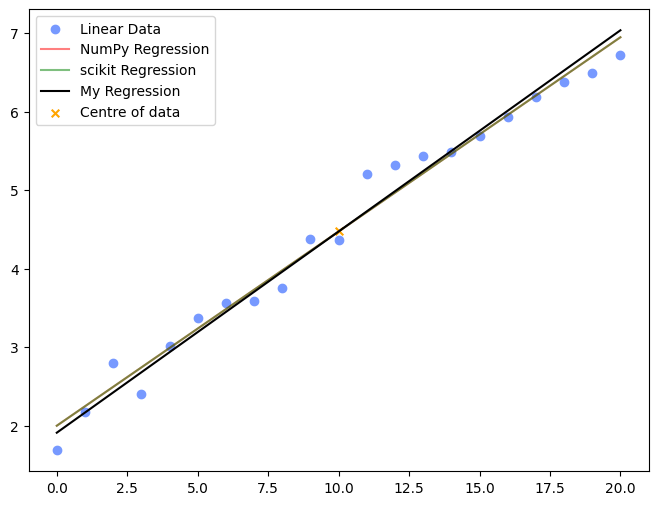

In [8]:
# from that, what else to try?

x_data = np.linspace(0, 20, 21)
y_data = np.linspace(2, 7, 21) + np.random.normal(0, 0.2, 21)

x_mid = np.mean(x_data)
y_mid = np.mean(y_data)

xt = abs(x_data - x_mid)
yt = abs(y_data - y_mid)

my_slope = np.mean(yt) / np.mean(xt)

slope_np, intercept_np = np.polyfit(x_data, y_data, 1)

model = LinearRegression()
model.fit(x_data.reshape(-1, 1), y_data)

# Get slope & intercept
slope_sk = model.coef_[0]
intercept_sk = model.intercept_

plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data, c="#79F", label="Linear Data")
plt.plot(x_data, slope_np*x_data + intercept_np, c="r", label="NumPy Regression", alpha=0.5)
plt.plot(x_data, slope_sk*x_data + intercept_sk, c="g", label="scikit Regression", alpha=0.5)
plt.plot(x_data, my_slope * (x_data - x_mid) + y_mid, c='k', label="My Regression")
plt.scatter(x_mid, y_mid, marker="x", s=30, c="orange", label="Centre of data")
plt.legend()
plt.show()

Can see my regression is almost there, but it seems that it was an approximation of a regerssion in that case? Let's try with the quadratic data.

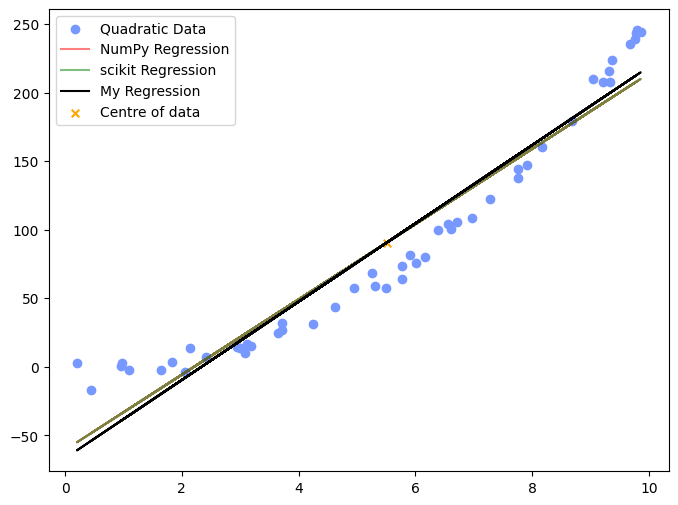

In [9]:
x_data = np.random.uniform(0, 10, 50)
y_data = 3 * x_data**2 - 5 * x_data + 2 + np.random.normal(0, 5, 50)

x_mid = np.mean(x_data)
y_mid = np.mean(y_data)

xt = abs(x_data - x_mid)
yt = abs(y_data - y_mid)

my_slope = np.mean(yt) / np.mean(xt)

slope_np, intercept_np = np.polyfit(x_data, y_data, 1)

model = LinearRegression()
model.fit(x_data.reshape(-1, 1), y_data)

# Get slope & intercept
slope_sk = model.coef_[0]
intercept_sk = model.intercept_

plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data, c="#79F", label="Quadratic Data")
plt.plot(x_data, slope_np*x_data + intercept_np, c="r", label="NumPy Regression", alpha=0.5)
plt.plot(x_data, slope_sk*x_data + intercept_sk, c="g", label="scikit Regression", alpha=0.5)
plt.plot(x_data, my_slope * (x_data - x_mid) + y_mid, c='k', label="My Regression")
plt.scatter(x_mid, y_mid, marker="x", s=30, c="orange", label="Centre of data")
plt.legend()
plt.show()

The important formula to consider, as usual with a 2d linear regression, is:

$Y_i =\alpha+ \beta X_i + \epsilon_i$

Ignoring the error, we get an equation for a regression line

$ Y' = a + bX $

The regression coefficient $r$ is the slope of the line, as it turns out, when $X$ and $Y$ are both expressed as $z$ scores.

In [10]:
# back to random linear data
x_data = np.linspace(0, 20, 21)
y_data = np.linspace(2, 7, 21) + np.random.normal(0, 0.2, 21)

def z(X): # X is a list or a value
    X = np.array(X)
    return (X - np.mean(X))/np.std(X)

def r(X, Y):
    X, Y = np.array(X), np.array(Y)
    
    if len(X) != len(Y):
        return ValueError("X and Y are arrays of different lengths")
    
    return np.dot(z(X), z(Y)) / len(X)

def slope(X, Y):
    r_val = r(X, Y)

    return r_val * np.std(Y) / np.std(X)

print(slope(x_data, y_data))
print(np.polyfit(x_data, y_data, 1)[0])

0.2458701962933284
0.24587019629332843


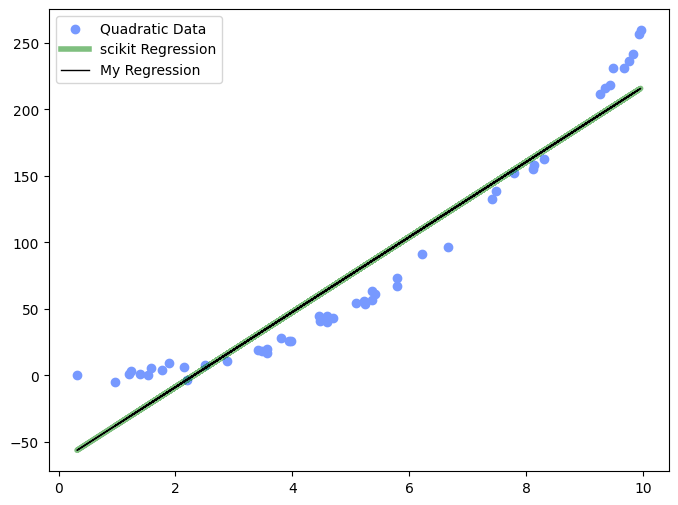

In [11]:
# now, given that the regression line crosses the mean of the two points:

def intercept(X, Y):
    x_mean, y_mean = np.mean(X), np.mean(Y)

    # Get the intercept by extrapolating
    return y_mean - slope(X, Y) * x_mean

# Can now find my 2d linear regression.

x_data = np.random.uniform(0, 10, 50)
y_data = 3 * x_data**2 - 5 * x_data + 2 + np.random.normal(0, 5, 50)

xt = abs(x_data - x_mid)
yt = abs(y_data - y_mid)

my_slope, my_intercept = slope(x_data, y_data), intercept(x_data, y_data)

model = LinearRegression()
model.fit(x_data.reshape(-1, 1), y_data)

# Get slope & intercept
slope_sk = model.coef_[0]
intercept_sk = model.intercept_

plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data, c="#79F", label="Quadratic Data")
plt.plot(x_data, slope_sk*x_data + intercept_sk, c="g", linewidth=4, label="scikit Regression", alpha=0.5)
plt.plot(x_data, my_slope*x_data + my_intercept, c='k', linewidth=1, label="My Regression")
plt.legend()
plt.show()

In [19]:
print(f"The absolute error between my model and the sklearn model\n = {abs(my_slope - slope_sk)}")
print("So, the error is pretty much zero, and hence the model is good enough")

The absolute error between my model and the sklearn model
 = 7.105427357601002e-15
So, the error is pretty much zero, and hence the model is good enough
